In [1]:
#importing necessery packages
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


In [2]:
#loading dataset
data=pd.read_csv('creditcard.csv')
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#exploring data
#V1 V2 are PCA compressed data
print(data.columns)


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [4]:
print(data.shape)


(284807, 31)


In [5]:
print(data.describe())


                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [6]:
#taking a portion of data instead of all data to educe computation
data = data.sample(frac=0.10,random_state=1)
print(data.shape)


(28481, 31)


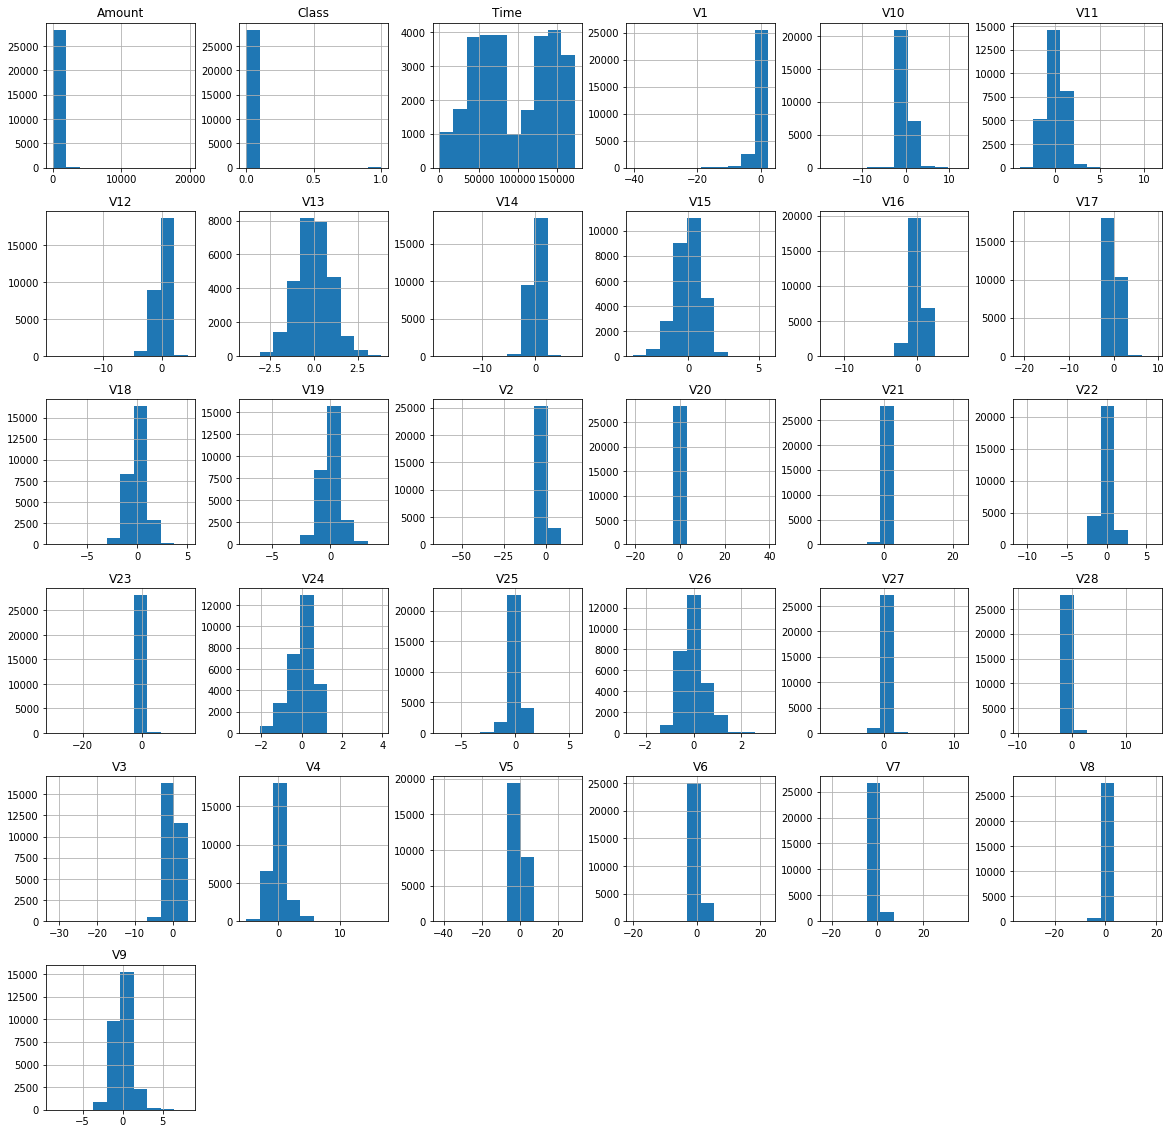

In [7]:
#plotting histogram of each variable
data.hist(figsize=(20,20))
plt.show()


In [8]:
#determine number of fraud and valid transaction
fraud = data[data['Class']==1]
valid = data[data['Class']==0]

print('Fraud Cases {}'.format( len(fraud)))
print('Valid Cases {}'.format( len(valid)))


Fraud Cases 49
Valid Cases 28432


In [9]:
fraction=len(fraud)/float(len(valid))
print('Percentage of fraud case: {}'.format(fraction))


Percentage of fraud case: 0.0017234102419808666


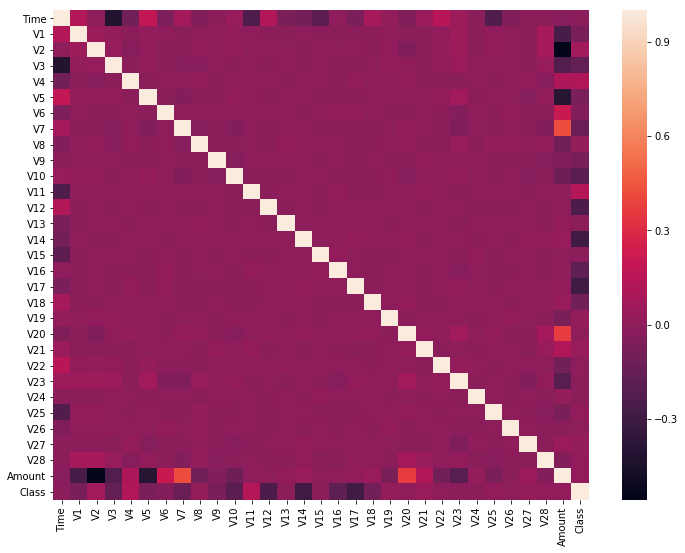

In [10]:
#correlation matrix which shows relation between each variable
#this also shows which variable to drop

cormat= data.corr()
fig=plt.figure(figsize=(12,9))
sns.heatmap(cormat,vmax=1)
plt.show()


In [11]:
#plot ta theke dkha jacce class er sathe konotar kharap relation ba khub bshi vlo relation nai...so kono column drop 
#kra jabena.....joto white toto vlo relation...joto kalo toto kharap ralation

In [12]:
#Get all the columns from dataframe
columns=data.columns.tolist()

#filtering columns(jehetu class amr output,eta amr input e thkbena)...ar kono column bad deyar thkle ekhne bad ditam
columns= [c for c in columns if c not in ['Class']]
target = ['Class']

X=data[columns]
Y=data[target]

#print the shape of X and Y
print(X.shape)
print(Y.shape)

(28481, 30)
(28481, 1)


In [13]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=0)






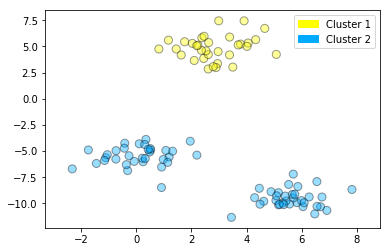

In [18]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from adspy_shared_utilities import plot_labelled_scatter

X, y = make_blobs(random_state = 10)

kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)

plot_labelled_scatter(X, kmeans.labels_, ['Cluster 1', 'Cluster 2'])
